In [ ]:
可视化网络权重

In [7]:
#vis
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
#加载resnet50模型

import torchvision.models as models
import torch
from torch import nn
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
# os.environ['CUDA_VISIBLE_DEVICES']=''

resnet50 = models.resnet50(pretrained=True)
model=resnet50

# 可视化权重
# plt.rcParams['figure.figsize'] = (8, 8) #800像素
plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

model.eval()

## 显示conv1卷积核

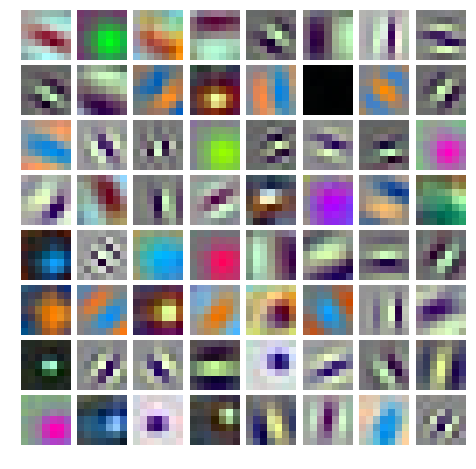

In [40]:
# 显示conv1卷积核

fig = plt.figure(figsize=(8,8))
# fig.subplots_adjust(wspace=0.01,hspace=0.01)
plt.subplots_adjust(wspace=0.1, hspace=0.1)  #left=0.,right=1,bottom=0.,top=1,
with torch.no_grad():
    for i in range(64):
        plt.subplot(8, 8, i+1)
        plt.axis('off')
        # fig.subplots_adjust(wspace=0.1, hspace=0.1)
        # plt.tight_layout()
        img=model._modules['conv1']._parameters['weight'].data[i,:,:,:].cpu().numpy().transpose((1,2,0))
        pmin=np.min(img)
        pmax=np.max(img)
        img=(img-pmin)/(pmax-pmin+0.000001)
        plt.imshow(img,cmap='gray')

## 显示Layer1

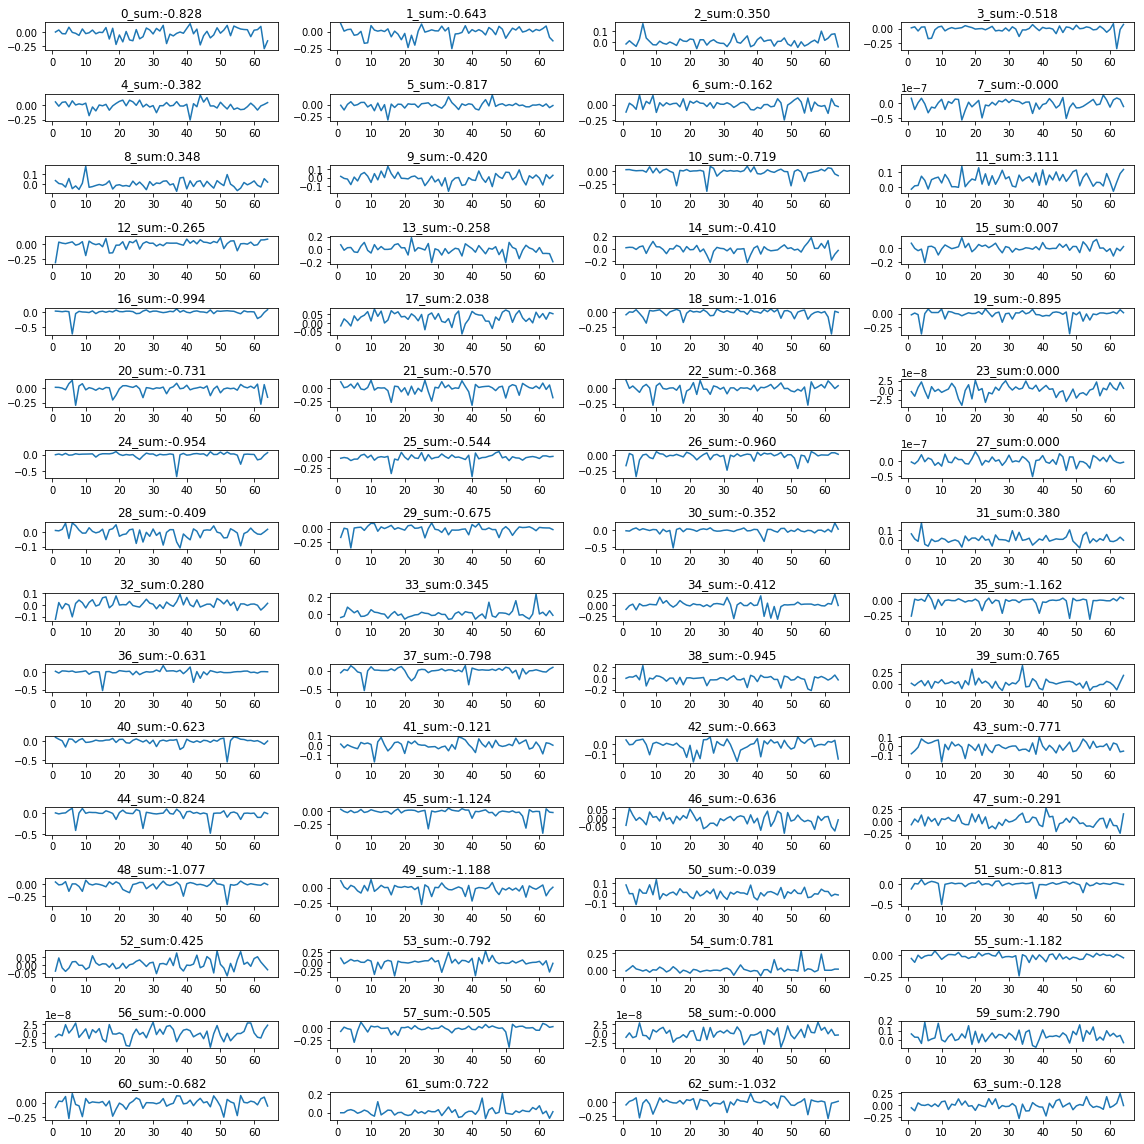

In [84]:
# 显示layer1.0.conv1卷积核 1x1卷积 weight=[64,64,1,1]
x=np.linspace(1,64,64)
fig=plt.figure(figsize=(16,16))
# plt.subplots_adjust(wspace=0.2, hspace=0.5) 
for i in range(64):
    plt.subplot(16, 4, i+1)
    y=model.layer1._modules['0']._modules['conv1'].weight.data[i,:,0,0].cpu().numpy()
    plt.plot(x,y)
    plt.tight_layout()
    name="layer1.0.conv1.{}".format(i)
    plt.title("{}_sum:{:.3f}".format(i,np.sum(y)))
#     plt.savefig()
fig.savefig('/media/han/E/mWork/Nut_sync/vis_resnet50/layer1-0-conv1.png',dpi=100)

Text(0.5,1,'sum:12.028')

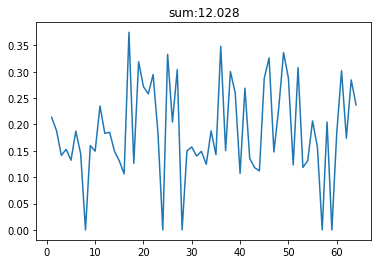

In [75]:
# 显示layer1.0.bn1
x=np.linspace(1,64,64)
y=model.layer1._modules['0']._modules['bn1']._parameters['weight'].data.cpu().numpy()
plt.plot(x,y)
plt.title("sum:{:.3f}".format(np.sum(y)))

Text(0.5,1,'sum:1.977')

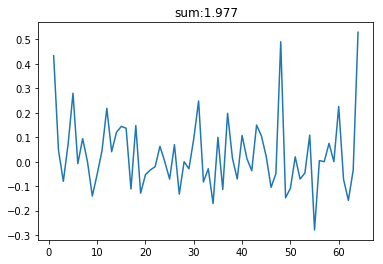

In [76]:
# 显示layer1.0.bn1
x=np.linspace(1,64,64)
y=model.layer1._modules['0']._modules['bn1']._parameters['bias'].data.cpu().numpy()
plt.plot(x,y)
plt.title("sum:{:.3f}".format(np.sum(y)))

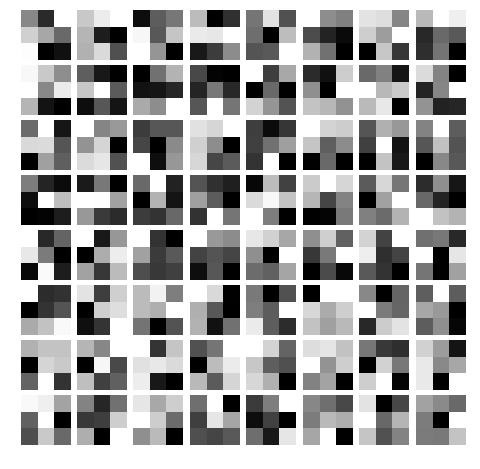

In [82]:
# 显示layer1.0.conv2卷积核 3x3卷积 weight=[64,64,3,3] 卷积核个数,特征图channel,kernel,kernel
# 显示第一个卷积核
kernel_idx=0
fig = plt.figure(figsize=(8,8))
# fig.subplots_adjust(wspace=0.01,hspace=0.01)
plt.subplots_adjust(wspace=0.1, hspace=0.1)  #left=0.,right=1,bottom=0.,top=1,
with torch.no_grad():
    for i in range(64):
        plt.subplot(8, 8, i+1)
        plt.axis('off')
        # fig.subplots_adjust(wspace=0.1, hspace=0.1)
        # plt.tight_layout()
        img=model.layer1._modules['0']._modules['conv2'].weight.data[kernel_idx,i,:,:].cpu().numpy()
        # img=model._modules['conv1']._parameters['weight'].data[i,:,:,:].cpu().numpy().transpose((1,2,0))
        pmin=np.min(img)
        pmax=np.max(img)
        img=(img-pmin)/(pmax-pmin+0.000001)
        plt.imshow(img,cmap='gray')
        
fig.savefig('/media/han/E/mWork/Nut_sync/vis_resnet50/layer1-0-conv2_idx0.png',dpi=100)    

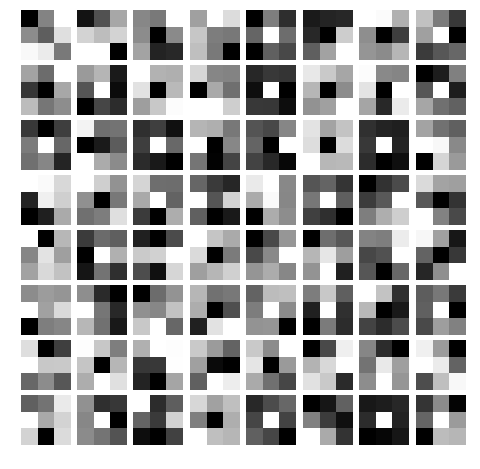

In [83]:
# 显示layer1.0.conv2卷积核 3x3卷积 weight=[64,64,3,3] 卷积核个数,特征图channel,kernel,kernel
# 显示第2个卷积核
kernel_idx=1
fig = plt.figure(figsize=(8,8))
# fig.subplots_adjust(wspace=0.01,hspace=0.01)
plt.subplots_adjust(wspace=0.1, hspace=0.1)  #left=0.,right=1,bottom=0.,top=1,
with torch.no_grad():
    for i in range(64):
        plt.subplot(8, 8, i+1)
        plt.axis('off')
        # fig.subplots_adjust(wspace=0.1, hspace=0.1)
        # plt.tight_layout()
        img=model.layer1._modules['0']._modules['conv2'].weight.data[kernel_idx,i,:,:].cpu().numpy()
        # img=model._modules['conv1']._parameters['weight'].data[i,:,:,:].cpu().numpy().transpose((1,2,0))
        pmin=np.min(img)
        pmax=np.max(img)
        img=(img-pmin)/(pmax-pmin+0.000001)
        plt.imshow(img,cmap='gray')
        
fig.savefig('/media/han/E/mWork/Nut_sync/vis_resnet50/layer1-0-conv2_idx1.png',dpi=100)          